In [1]:
from css_utility import *

/home/lee/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Is the enhancers in genic regions are always labelled as genic enhancer?
* "F": genic enhancer
* "G": ehnacer

In [97]:
with open("../database/temp_files/whole_gene_unit/E003_css_gene_unit_lst_all.pkl", 'rb') as file:
    data = pickle.load(file)

In [98]:
all_genes_in_cell=flatLst(data)

In [99]:
genic_enh_in_gene=[item for item in all_genes_in_cell if "F" in item]

In [100]:
enh_in_gene=[item for item in all_genes_in_cell if "G" in item]

In [101]:
two_enh_in_gene=[item for item in all_genes_in_cell if "G" in item and "F" in item]

In [102]:
len(genic_enh_in_gene)

6454

In [115]:
type(genic_enh_in_gene)

list

In [103]:
len(enh_in_gene)

26455

In [112]:
len(two_enh_in_gene)

4483

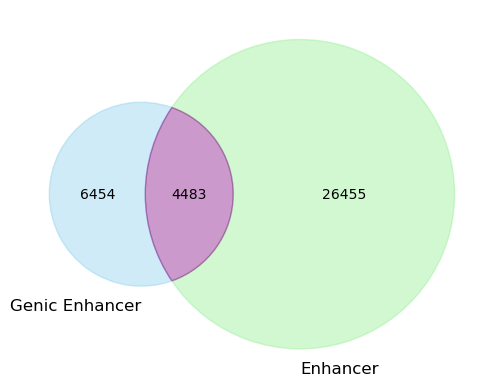

In [123]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Define the sizes of the sets
set1_size = len(genic_enh_in_gene)
set2_size = len(enh_in_gene)
intersection_size = len(two_enh_in_gene)

# Create the Venn diagram
venn = venn2(subsets=(set1_size, set2_size, intersection_size),
             set_labels=('Genic Enhancer', 'Enhancer', 'Enhancer and Genic Enhancer'))

# Change the colors of each section
venn.get_patch_by_id('10').set_color('skyblue')  # Change color of genic_enh set
venn.get_patch_by_id('01').set_color('lightgreen')  # Change color of enh set
venn.get_patch_by_id('11').set_color('purple')  # Change color of intersection

In [ ]:
pickle.load("../database/temp_files/whole_gene_unit/E003_css_gene_unit_lst_all.pkl")

In [73]:
path="../database/bed/unzipped/E001_15_coreMarks_stateno.bed"

In [74]:
df=bed2df_expanded(path)
df.head()

,chromosome,start,end,state,length,unit,state_seq,state_seq_full
0,chr1,0,9800,15,9800,49,O,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
1,chr1,9800,10600,9,800,4,I,IIII
2,chr1,10600,540400,15,529800,2649,O,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...
3,chr1,540400,540800,1,400,2,A,AA
4,chr1,540800,569800,15,29000,145,O,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...


In [75]:
unit_css=df2unitcss(df)

In [76]:
type(unit_css[0])

str

In [64]:
unit_css[0]=unit_css[0][50:]

In [66]:
unit_css[-1]=unit_css[-1][:-50]

In [68]:
splitted, kmerized_unit_css=css_CUT_Kmer(unit_css, cut_thres=510, k=4)

In [70]:
len(kmerized_unit_css)

30361

In [71]:
type(kmerized_unit_css)

list

In [72]:
type(kmerized_unit_css[0])

str

In [80]:
def cutKmerByCell(unzipped_bed_file_path,k=4):
    df=bed2df_expanded(path)
    unit_css=df2unitcss(df)
    assert isinstance(unit_css[0], str) 
    if len(unit_css[0])>=50 and len(unit_css[-1])>50:
        unit_css[0]=unit_css[0][50:] # cut the telomere
        unit_css[-1]=unit_css[-1][:-50] # cut the telomere
        
    _, kmerized_unit_css=css_CUT_Kmer(unit_css, cut_thres=510, k=k)
    
    filtered_kmerized_unit_css=[item for item in kmerized_unit_css if len(item)>=k]
    return filtered_kmerized_unit_css

In [81]:
filtered_kmerized_unit_css=cutKmerByCell(path,k=4)

In [88]:
output_path="../database/temp_files/whole_genome/byCellType/E001_whole_css_wo_telo.txt"

In [89]:
with open(output_path,"w") as save_file:
        save_file.write("\n".join(filtered_kmerized_unit_css))

In [ ]:
with open(fn,"w") as save_file:
        save_file.write("\n".join(ch1_unit_css_wotelo_kmer))

In [ ]:
css_gene_lst_all=compGene2css(whole_gene_file,df)

In [ ]:
css_Ngene_lst_all=compNonGene2css(whole_gene_file,df)

Check whether the Gexp_or_not fine-tuning data contain any empty line

In [9]:
path="../database/fine_tune/gene_exp/4mer/Gexp_or_not/tr_len_40k/dev.tsv"

In [10]:
df=pd.read_csv(path, engine='python', sep="\t")
df["sequence"].isna().sum()

2

In [2]:
path="../database/pretrain/expressed/4mer/whole_gene/E003_whole_gene.txt"

In [5]:
with open(path,"r") as f:
    file=f.read()

In [6]:
type(file)

str

In [14]:
file[:2000]

'OOOO OOOO OOOO OOOO OOOO OOOE OOEE OEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEED EEDD EDDD DDDD\nOOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO\nAAEE AEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEG EEGG EGGG GGGG GGGG GGGE GGEE GEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EEEE EE

In [7]:
path2="../database/wo_telo/cell15_4_wo_telo_v1.01.txt"
with open(path2,"r") as g:
    file2=g.read()
type(file2)

str

In [13]:
file2[:2000]

'OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOA OOAA OAAO AAOO AOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO\nOOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOO

In [3]:
colored_css_str_as_is("EEDDD")

EEDDD


In [4]:
colored_css_str_as_is("EEEEE")

EEEEE


In [5]:
colored_css_str_as_is("DDDDD")

DDDDD


In [6]:
colored_css_str_as_is("FFFFFFEEEEEDDDDDDDDDEEEE")

FFFFFFEEEEEDDDDDDDDDEEEE


In [8]:
len("AAAAAAAAAAAAABBGGGFEEEEE")

24

In [7]:
colored_css_str_as_is("DDDEEEEEEEEDDDDDDDDDDDDD")

DDDEEEEEEEEDDDDDDDDDDDDD


In [20]:
colored_css_str_as_is("EEEEEEEEEEEDDDDDDDEEEEEE")

EEEEEEEEEEEDDDDDDDEEEEEE


In [9]:
colored_css_str_as_is("DDDDEEEEEEEDDDDDDDDDDDEE")

DDDDEEEEEEEDDDDDDDDDDDEE


In [17]:
colored_css_str_as_is("EEEEEEEEEEEDDDDDEEEEEEEE")

EEEEEEEEEEEDDDDDEEEEEEEE


In [19]:
colored_css_str_as_is("EEEEEEEEEEEDDDDDDDEEEEDD")

EEEEEEEEEEEDDDDDDDEEEEDD


In [14]:
colored_css_str_as_is("AAAAAAAAEEEDDDDEEEEEEEGG")

AAAAAAAAEEEDDDDEEEEEEEGG


In [ ]:
colored_css_str_as_is("")

In [ ]:
colored_css_str_as_is("")

In [2]:
import pandas as pd

In [1]:
file="../database/57epigenomes.RPKM.pc.tsv"

In [3]:
df=pd.read_csv(file, sep="\t")

In [4]:
df.head()

,gene_id,E000,E003,E004,E005,E006,E007,E011,E012,E013,...,E114,E116,E117,E118,E119,E120,E122,E123,E127,E128
ENSG00000000003,23.265,43.985,37.413,29.459,21.864,55.649,52.940,71.629,61.292,44.280,...,0.038,42.639,49.983,11.554,11.847,43.723,0.267,13.758,15.818,NaN
ENSG00000000005,0.872,1.642,6.498,0.000,0.157,0.003,0.115,0.087,0.055,1.577,...,0.000,0.000,0.000,0.000,0.018,0.000,0.006,0.000,0.000,NaN
ENSG00000000419,55.208,35.259,58.308,48.208,37.477,45.923,44.959,40.438,41.970,51.515,...,79.197,107.098,62.811,42.386,54.869,16.652,73.719,56.578,56.371,NaN
ENSG00000000457,3.237,2.596,2.345,8.775,2.723,3.700,3.912,5.011,4.158,3.292,...,11.082,8.814,2.646,2.483,2.527,2.549,7.651,4.967,3.714,NaN
ENSG00000000460,7.299,6.649,7.838,7.324,0.830,5.354,5.940,5.704,6.213,7.551,...,13.743,25.369,3.373,4.646,2.179,4.099,22.103,3.290,2.491,NaN


In [5]:
len(df)

19795